# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.654  1  1.218 0.271 0.006   
                             age        0.304  1  0.566 0.453 0.003   
                             Kiel       2.428  1  4.519 0.035 0.023   
                             Magdeburg  3.920  1  7.296 0.008 0.037   
                             Sweden     6.370  1 11.857 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.319  1  0.319 0.573 0.002   
                             age        0.256  1  0.255 0.614 0.001   
                             Kiel       0.042  1  0.042 0.837 0.000   
                             Magdeburg  1.761  1  1.760 0.186 0.009   
                             Sweden    14.794  1 14.787 0.000 0.072   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.567  0.433    False  
                             age               0.344  0.607    False  
                             Kiel              1.458  0.091    False  
                             Magdeburg         2.123  0.027     True  
                             Sweden            3.151  0.004     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.242  0.707    False  
                             age               0.212  0.743    False  
                             Kiel              0.077  0.905    False  
                             Magdeburg         0.730  0.330    False  
                             Sweden            3.785  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.715  1  4.461 0.036 0.023   
                             age        0.023  1  0.144 0.705 0.001   
                             Kiel       0.461  1  2.875 0.092 0.015   
                             Magdeburg  0.917  1  5.724 0.018 0.029   
                             Sweden     2.348  1 14.660 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         6.343  1  3.263 0.072 0.017   
                             age        1.507  1  0.775 0.380 0.004   
                             Kiel      10.460  1  5.381 0.021 0.027   
                             Magdeburg 15.989  1  8.226 0.005 0.041   
                             Sweden     0.009  1  0.005 0.945 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.444  0.088    False  
                             age               0.152  0.802    False  
                             Kiel              1.038  0.183    False  
                             Magdeburg         1.752  0.049     True  
                             Sweden            3.758  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.140  0.152    False  
                             age               0.421  0.531    False  
                             Kiel              1.669  0.058    False  
                             Magdeburg         2.338  0.016     True  
                             Sweden            0.025  0.967    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.271         0.567  0.433    False   
                             Kiel      0.035         1.458  0.091    False   
                             Magdeburg 0.008         2.123  0.027     True   
                             Sweden    0.001         3.151  0.004     True   
                             age       0.453         0.344  0.607    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.573         0.242  0.707    False   
                             Kiel      0.837         0.077  0.905    False   
                             Magdeburg 0.186         0.730  0.330    False   
                             Sweden    0.000         3.785  0.001     True   
                             age       0.614         0.212  0.743    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.036         1.444  0.088    False  
                             Kiel      0.092         1.038  0.183    False  
                             Magdeburg 0.018         1.752  0.049     True  
                             Sweden    0.000         3.758  0.001     True  
                             age       0.705         0.152  0.802    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.072         1.140  0.152    False  
                             Kiel      0.021         1.669  0.058    False  
                             Magdeburg 0.005         2.338  0.016     True  
                             Sweden    0.945         0.025  0.967    False  
                             age       0.380         0.421  0.531    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.482     0.336     0.245         2.743     0.312
std       0.303         5.316     0.331     0.298         5.168     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.339     0.015     0.002         0.360     0.008
50%       0.119         0.923     0.239     0.092         1.037     0.184
75%       0.458         2.417     0.611     0.436         2.715     0.582
max       1.000       146.123     1.000     1.000        83.725     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50753/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.271         0.567   
A0A024R0T9;K7ER74;P02655                           AD     0.042         1.373   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.131         0.882   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.593         0.227   
A0A075B6H7                                         AD     0.082         1.086   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.052         1.287   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.902         0.045   
S4R3U6                                             AD     0.573         0.242   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.433    False   
A0A024R0T9;K7ER74;P02655                           AD      0.106    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.255    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.725    False   
A0A075B6H7                                         AD      0.178    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.124    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.947    False   
S4R3U6                                             AD      0.707    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.036         1.444   
A0A024R0T9;K7ER74;P02655                           AD     0.027         1.575   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.356         0.448   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.306         0.514   
A0A075B6H7                                         AD     0.171         0.766   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.029         1.531   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.537         0.270   
S4R3U6                                             AD     0.072         1.140   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.088    False  
A0A024R0T9;K7ER74;P02655                           AD      0.069    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.505    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.455    False  
A0A075B6H7                                         AD      0.297    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.408     0.333     0.245         1.491     0.319
std       0.289         1.639     0.315     0.284         1.755     0.310
min       0.000         0.000     0.000     0.000         0.003     0.000
25%       0.012         0.374     0.038     0.009         0.368     0.029
50%       0.118         0.926     0.237     0.109         0.962     0.211
75%       0.423         1.938     0.580     0.428         2.028     0.575
max       1.000        22.544     1.000     0.994        23.027     0.995

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1031,995


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.271         0.567  0.433   
A0A024R0T9;K7ER74;P02655                           0.042         1.373  0.106   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.131         0.882  0.255   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.593         0.227  0.725   
A0A075B6H7                                         0.082         1.086  0.178   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.052         1.287  0.124   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.902         0.045  0.947   
S4R3U6                                             0.573         0.242  0.707   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.036   
A0A024R0T9;K7ER74;P02655                              False 0.027   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.356   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.306   
A0A075B6H7                                            False 0.171   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.029   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.537   
S4R3U6                                                False 0.072   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.444  0.088   
A0A024R0T9;K7ER74;P02655                                   1.575  0.069   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.448  0.505   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.514  0.455   
A0A075B6H7                                                 0.766  0.297   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.531  0.075   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.270  0.667   
S4R3U6                                                     1.140  0.152   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    959
PI (yes) - QRILC (yes)   354
PI (no)  - QRILC (yes)    72
PI (yes) - QRILC (no)     36
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50753/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.018         1.748  0.054    False   
A0A087WWT2;Q9NPD7                        0.045         1.344  0.111    False   
A0A087WXB8;Q9Y274                        0.005         2.297  0.019     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.016         1.797  0.049     True   
A0A087X1G7;A0A0B4J1S4;O60613             0.038         1.417  0.098    False   
...                                        ...           ...    ...      ...   
Q9P0K9                                   0.035         1.455  0.091    False   
Q9UJ14                                   0.015         1.811  0.048     True   
Q9UKB5                                   0.023         1.637  0.066    False   
Q9UNW1                                   0.016         1.808  0.048     True   
Q9UQ52                                   0.075         1.124  0.166    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.002         2.714  0.008     True   
A0A087WWT2;Q9NPD7                        0.007         2.170  0.022     True   
A0A087WXB8;Q9Y274                        0.215         0.668  0.352    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.064         1.191  0.139    False   
A0A087X1G7;A0A0B4J1S4;O60613             0.016         1.793  0.046     True   
...                                        ...           ...    ...      ...   
Q9P0K9                                   0.012         1.920  0.036     True   
Q9UJ14                                   0.022         1.650  0.060    False   
Q9UKB5                                   0.015         1.810  0.044     True   
Q9UNW1                                   0.157         0.805  0.278    False   
Q9UQ52                                   0.007         2.147  0.023     True   

                                              data  
                                         frequency  
protein groups                                      
A0A075B6I0                                     194  
A0A087WWT2;Q9NPD7                              193  
A0A087WXB8;Q9Y274                               89  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
A0A087X1G7;A0A0B4J1S4;O60613                   184  
...                                            ...  
Q9P0K9                                         192  
Q9UJ14                                         169  
Q9UKB5                                         148  
Q9UNW1                                         171  
Q9UQ52                                         188  

[108 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.433,0.088,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.106,0.069,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.255,0.505,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.725,0.455,196,PI (no) - QRILC (no)
A0A075B6H7,0.178,0.297,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.124,0.075,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.922,0.002,86,PI (no) - QRILC (yes),0.920
A2RU67,0.906,0.049,53,PI (no) - QRILC (yes),0.857
Q9NUQ9,0.790,0.002,114,PI (no) - QRILC (yes),0.788
P84157-2,0.734,0.004,101,PI (no) - QRILC (yes),0.730
P63167;Q96FJ2,0.644,0.014,137,PI (no) - QRILC (yes),0.630
...,...,...,...,...,...
Q9UJ14,0.048,0.060,169,PI (yes) - QRILC (no),0.012
K7ERI9;P02654,0.040,0.051,196,PI (yes) - QRILC (no),0.010
Q93063;Q93063-3,0.050,0.045,145,PI (no) - QRILC (yes),0.005


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


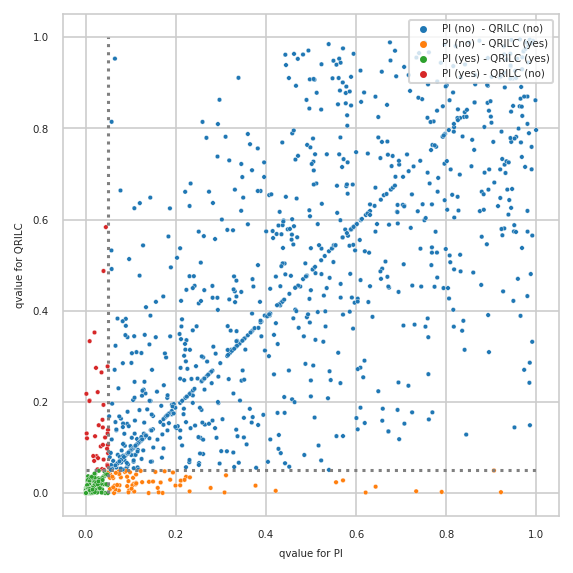

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


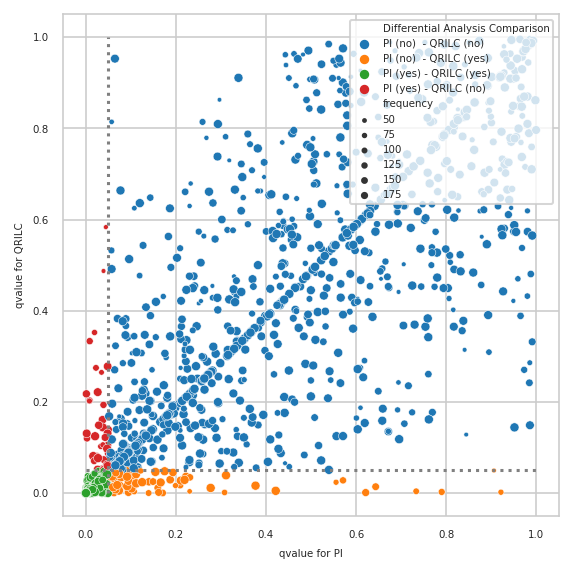

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out